In [2]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [5]:
!unzip "/content/drive/MyDrive/Soft Computing/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Soft Computing/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [6]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [7]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [8]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [9]:
print(len(train_set))
print(len(test_set))

60000
10000


In [10]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.593130886554718. Accuracy: 78.38
Iteration: 1000. Loss: 0.4449611306190491. Accuracy: 79.84
Iteration: 1500. Loss: 0.2257826328277588. Accuracy: 82.92
Iteration: 2000. Loss: 0.268472820520401. Accuracy: 81.42
Iteration: 2500. Loss: 0.3259049654006958. Accuracy: 81.77
Iteration: 3000. Loss: 0.33485281467437744. Accuracy: 84.38
Iteration: 3500. Loss: 0.40495747327804565. Accuracy: 83.15
Iteration: 4000. Loss: 0.3558547794818878. Accuracy: 86.11
Iteration: 4500. Loss: 0.598536491394043. Accuracy: 85.12
Iteration: 5000. Loss: 0.2590518593788147. Accuracy: 85.2
Iteration: 5500. Loss: 0.5145326852798462. Accuracy: 85.3
Iteration: 6000. Loss: 0.388575941324234. Accuracy: 85.88
Iteration: 6500. Loss: 0.2146158665418625. Accuracy: 85.88
Iteration: 7000. Loss: 0.2953919470310211. Accuracy: 86.8
Iteration: 7500. Loss: 0.29114001989364624. Accuracy: 86.47
Iteration: 8000. Loss: 0.17398060858249664. Accuracy: 86.35
Iteration: 8500. Loss: 0.17512279748916626. Accuracy: 85.74


[0.593130886554718, 0.4449611306190491, 0.2257826328277588, 0.268472820520401, 0.3259049654006958, 0.33485281467437744, 0.40495747327804565, 0.3558547794818878, 0.598536491394043, 0.2590518593788147, 0.5145326852798462, 0.388575941324234, 0.2146158665418625, 0.2953919470310211, 0.29114001989364624, 0.17398060858249664, 0.17512279748916626, 0.16812309622764587, 0.2871745228767395, 0.22937467694282532, 0.45311570167541504, 0.42631620168685913, 0.16077198088169098, 0.15035195648670197, 0.16219362616539001, 0.33175310492515564, 0.21736273169517517, 0.20331887900829315, 0.3933936357498169, 0.20640234649181366, 0.2725418508052826, 0.37533533573150635, 0.7888023257255554, 0.34924283623695374, 0.4159635901451111, 0.0650215893983841]


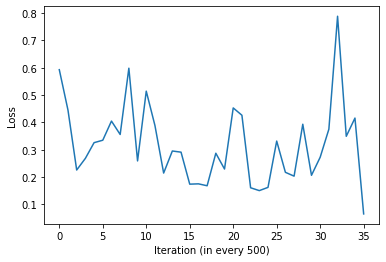

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [12]:
# Hyperparameters

batch_size = 80
num_iters = 80000
input_dim = 28*28 # num_features = 784
num_hidden = 500 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)

         ### 4rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_4(out)

      ### 5rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)

      ### 6rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_6(out)
      
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.43809646368026733. Accuracy: 83.0
Iteration: 1000. Loss: 0.47201862931251526. Accuracy: 82.98
Iteration: 1500. Loss: 0.27757591009140015. Accuracy: 84.37
Iteration: 2000. Loss: 0.3567868173122406. Accuracy: 85.6
Iteration: 2500. Loss: 0.30652302503585815. Accuracy: 87.56
Iteration: 3000. Loss: 0.23119381070137024. Accuracy: 87.26
Iteration: 3500. Loss: 0.3679119050502777. Accuracy: 86.82
Iteration: 4000. Loss: 0.23765721917152405. Accuracy: 88.05
Iteration: 4500. Loss: 0.2724456191062927. Accuracy: 88.3
Iteration: 5000. Loss: 0.26346445083618164. Accuracy: 87.41
Iteration: 5500. Loss: 0.31706130504608154. Accuracy: 88.38
Iteration: 6000. Loss: 0.1620979607105255. Accuracy: 88.64
Iteration: 6500. Loss: 0.25913581252098083. Accuracy: 88.99
Iteration: 7000. Loss: 0.3304555118083954. Accuracy: 88.21
Iteration: 7500. Loss: 0.17119494080543518. Accuracy: 89.37
Iteration: 8000. Loss: 0.1664924919605255. Accuracy: 88.59
Iteration: 8500. Loss: 0.13201841711997986. Accura

[0.43809646368026733, 0.47201862931251526, 0.27757591009140015, 0.3567868173122406, 0.30652302503585815, 0.23119381070137024, 0.3679119050502777, 0.23765721917152405, 0.2724456191062927, 0.26346445083618164, 0.31706130504608154, 0.1620979607105255, 0.25913581252098083, 0.3304555118083954, 0.17119494080543518, 0.1664924919605255, 0.13201841711997986, 0.08288321644067764, 0.3072502315044403, 0.1288340985774994, 0.30325400829315186, 0.17412249743938446, 0.255376935005188, 0.2932339012622833, 0.22125153243541718, 0.20208171010017395, 0.31427162885665894, 0.22045953571796417, 0.12089965492486954, 0.08042921870946884, 0.11178173124790192, 0.12666550278663635, 0.20408478379249573, 0.17867903411388397, 0.18980957567691803, 0.18978554010391235, 0.10661612451076508, 0.14049552381038666, 0.09613128006458282, 0.17780663073062897, 0.1339149922132492, 0.13660697638988495, 0.17640894651412964, 0.09913339465856552, 0.03955335542559624, 0.0535198338329792, 0.21226179599761963, 0.0970354974269867, 0.047

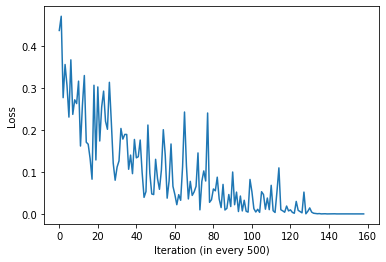

In [13]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()